<a href="https://colab.research.google.com/github/cperalta22/rplots/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

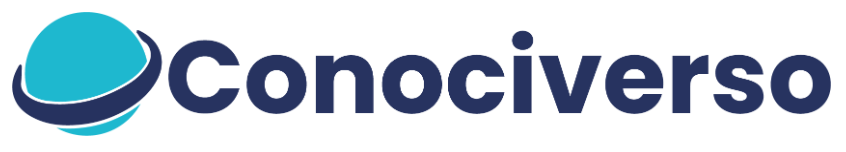


Carlos Alberto Peralta Alvarez 2025 | GPL3

# Visualización de datos en R

Algunos recursos muy útiles para graficar en R los puedes encontrar en [R graph gallery](https://r-graph-gallery.com) y también en [R CHARTS](https://r-charts.com/es/)

## ☝ Graficos con el paquete _base_ de R

Son funciones que vienen preestablecidas en el lenguaje de programación y no se requiere nada mas para hacerlas funcionar.

### 📚 Preparación de los datos

### Instrucciones

*   Descarga e importa este [archivo](https://github.com/cperalta22/rconociverso/
blob/main/biodatos/edgeR_EPREC-HSPC_unfiltered.tabular) al ambiente de trabajo de colab
*   Importa el paquete tidyverse al entorno de trabajo con `library(tidyverse)`
*   usa la función `read_tsv()` para asignarlo como un tibble a la variable `tabla`
*   Explora su contenido con `head()` y `glimpse()`

In [ ]:
library(tidyverse)

In [ ]:
tabla <- read_tsv("/content/edgeR_EPREC-HSPC_unfiltered.tabular")

In [ ]:
head(tabla)
glimpse(tabla)

### ☝ **Funciones de alto nivel (crean gráficos completos)**
1. **`plot()`**  
   Función genérica para crear gráficos (dispersión, líneas, barras, etc.). El tipo de gráfico depende de los datos de entrada (vectores, factores, matrices).  
   Ejemplo: `plot(x, y)` genera un diagrama de dispersión si `x` e `y` son numéricos.

2. **`hist()`**  
   Crea histogramas para visualizar distribuciones de datos numéricos.  
   Ejemplo: `hist(datos, breaks = 10)` divide los datos en 10 intervalos.

3. **`barplot()`**  
   Genera gráficos de barras para datos categóricos o tablas de frecuencias.  
   Ejemplo: `barplot(table(datos))` muestra frecuencias de categorías.

4. **`boxplot()`**  
   Dibuja diagramas de caja y bigotes para resumir distribuciones y detectar valores atípicos.  
   Ejemplo: `boxplot(datos)`

5. **`pie()`**  
   Crea gráficos de sectores (tartas) para proporciones categóricas.  
   Ejemplo: `pie(table(datos))` representa porcentajes de categorías.


In [ ]:
plot(x = tabla$FDR, y = tabla$logFC)

In [ ]:
hist(tabla$logCPM)

In [ ]:
barplot(sort(tabla$logFC))

### ☝ **Funciones de bajo nivel (añaden elementos a gráficos existentes)**
1. **`lines()`**  
   Añade líneas conectando puntos en un gráfico existente.  
   Ejemplo: `lines(x, y, col = "red")`.

2. **`abline()`**  
   Dibuja líneas rectas (horizontales, verticales o de regresión).  
   Ejemplo: `abline(h = 0, lty = 2)` traza una línea horizontal punteada.

3. **`points()`**  
    Agrega puntos a un gráfico.  
    Ejemplo: `points(x, y, pch = 19, col = "blue")`.

4. **`legend()`**  
    Inserta una leyenda para identificar elementos del gráfico.  
    Ejemplo: `legend("topright", legend = c("Grupo A", "Grupo B"), col = c("red", "blue"))`.

5. **`text()`**  
    Añade texto en coordenadas específicas del gráfico.  
    Ejemplo: `text(x = 5, y = 10, labels = "Pico máximo")`.

6. **`grid()`**  
    Superpone una cuadrícula al gráfico.  
    Ejemplo: `grid(nx = 10, ny = 10, col = "gray90")`.

7. **`title()`**  
    Agrega o modifica títulos y etiquetas de ejes.  
    Ejemplo: `title(main = "Título principal", xlab = "Eje X")`.

8. **`axis()`**  
    Personaliza ejes (etiquetas, marcas, colores).  
    Ejemplo: `axis(side = 2, at = seq(0, 100, 10))`.


In [ ]:
plot(sort(tabla$logFC), ylab = "log2FC" ,col = "blue")
abline(h =1.5, col = "red")
abline(h = -1.5, col = "red")
title("Distribucion de log2FC")

### Tip

Visita este sitio para conocer el nombre de los [colores](https://r-charts.com/es/colores/)

## ☝ Gráficos con `ggplot2`

`ggplot2` forma parte de `tidyverse` por lo que si hemos cargado esta última en el ambiente podemos ya comenzar a graficar con este paquete

 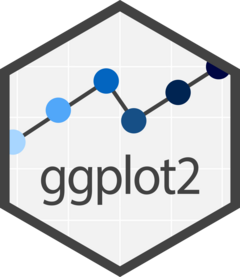

### ☝Exploremos nuestros datos

In [ ]:
glimpse(tabla)

In [ ]:
tabla <- tabla |>
   mutate(significativo = case_when(
      abs(logFC) >= 1.5 & FDR < 0.005 ~ "Expresión diferencial",
      .default = "No significativo"
   ))

tabla |> group_by(significativo) |> summarise(occurrencias = n(), logCPM_medio = mean(logCPM))

In [ ]:
tabla <- tabla |> mutate(direccion = case_when(
  significativo == "Expresión diferencial" & logFC < 0 ~ "Subexpresado",
  significativo == "Expresión diferencial" & logFC > 0 ~ "Sobreexpresado",
  .default = "No significativo"
))

tabla |> group_by(direccion) |> summarise(ocurrencias = n(), logCPM_medio = mean(logCPM))

## ☝Componentes básicos de la función ggplot

* La función `ggplot()` y su contenido
  * `data` los datos con los que comenzamos, podemos omitirlo si lo pasamos con un pipe `|>`
  *  `mapping` dónde definimos los datos en particular que utilizaremos, los definiremos como los ejes `x` y `y`, dentro de la función de estética: `aes()` ahí también podremos definir otros parámetros visuales como colores, rellenos entre otros.
* Una función de geometría `geom_xxxxx()` dónde definiremos el tipo de gráfica que deseamos, en muchos casos podemos agregar parámetros estéticos adicionales nuevamente con la función `aes()`

In [ ]:
ggplot(data = tabla, mapping = aes(x = direccion)) +
  geom_bar()

In [ ]:
ggplot(data = tabla, mapping = aes(x = direccion, fill = direccion)) +
  geom_bar()

## ☝ Exploremos nuestros datos visualmente

In [ ]:
glimpse(tabla)

In [ ]:
ggplot(data = tabla, mapping = aes(x = direccion, y= logFC,fill = direccion)) +
  geom_boxplot()

In [ ]:
ggplot(data = tabla, mapping = aes(x = significativo, y= FDR,fill = direccion)) +
  geom_boxplot()

In [ ]:
ggplot(data = tabla, mapping = aes(x = significativo, y= log(FDR) ,fill = direccion)) +
  geom_boxplot()

In [ ]:
ggplot(data = tabla, mapping = aes(x = significativo, y= log(FDR) ,fill = direccion)) +
  geom_boxplot() +
  ylim(c(-100,10))

## ☝ Hagamos un plot listo para ser publicado

### 🌋 Volcano plot



In [ ]:
ggplot(data = tabla, mapping = aes(x = logFC, y= -log10(FDR))) +
  geom_point()

### 👸 Hagámoslo "bonito"

Agreguemos colores, titulos y líneas de referencia



In [ ]:
ggplot(data = tabla, mapping = aes(x = logFC, y= -log10(FDR) ,color = direccion, shape = significativo)) +
  geom_point(size = 5) +
  ggtitle("Volcano plot de los cambios de expresión", subtitle = "DESeq2 Wild type vs Fármaco 1") +
  labs(caption = "Hecho con ggplot2!")+
  geom_vline(xintercept=-1.5, linetype = "dotted", color = "blue")+
  geom_vline(xintercept=1.5, linetype = "dotted", color = "darkgreen")+
  theme_classic()

### 📸 Guardemos el resultado

Con la función `pdf()` podemos guardar nuestro plot para la posteridad

**Es importante que guardemos nuestro plot como un objeto de R antes de seguir adelante**

```
pdf("titulo de mi plot.pdf",width = 8, height = 4) # dimensiones en pulgadas
objeto_con_nuestro_plot
dev.off() # con esto le decimos a R que ya terminamos de definir nuestro pdf
```

In [ ]:
miplot <- ggplot(data = tabla, mapping = aes(x = logFC, y= -log10(FDR) ,color = direccion, shape = significativo)) +
  geom_point(size = 5) +
  ggtitle("Volcano plot de los cambios de expresión", subtitle = "DESeq2 Wild type vs Fármaco 1") +
  labs(caption = "Hecho con ggplot2!")+
  geom_vline(xintercept=-1.5, linetype = "dotted", color = "blue")+
  geom_vline(xintercept=1.5, linetype = "dotted", color = "darkgreen")+
  theme_classic()

In [ ]:
pdf("Mi_fabuloso_plot_de_R.pdf", width = 5 , height = 5)
miplot
dev.off()